# Aula 3 - Criação de df e filtragem de dados

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução ao Pandas
- 2) Conceitos de Dataframe e Series
- 3) Axis e slicing: uso de loc/iloc
- 4) Criação e manipulação de DF e SS a partir de dicionário, listas e arrays
- 5) Filtragem de dados e parâmetro inplace
- 6) Criação e manipulação de colunas

_______

### Objetivos

Apresentar o pandas, frisando sua importância para o processamento de dados e em data science. Apresentar seus principais conceitos (Series, DataFrame) e funcionalidades (leitura de arquivo, filtros, seleção, apply, escrita de arquivos, etc.)

### Habilidades a serem desenvolvidas nessa aula

Ao final da aula o aluno deve:

- Conhecer o pandas, suas vantagens e principais usos;
- Entender o conceito de Series e como elas são construídas;
- Entender o conceito de DataFrame em termos das Series;
- Saber como trabalhar com DataFrames para o processamento de dados:
    - Seleções: uso de loc/iloc;
    - Filtros;
    - Criação de novas colunas.
- Saber como ler e escrever de/em um arquivo com o pandas (csv, excel, etc.).

____
____
____

## 1) Pandas

O pandas é uma das bibliotecas mais usadas em Data Science por ser fácil de usar além de ter alta performance. Ela utiliza dois objetos muito importantes que são as **Series** e os **DataFrames**.

### Instalação
Existem diversas formas de instalar o pandas. A mais simples é instalar o pacote Anaconda (https://www.anaconda.com/distribution/) que já vem com o Python e diversas bibliotecas científicas e ciência de dados instaladas.

Outra forma, caso você já tenha o python instalado mas não o pandas, é o utilizar o gerenciador e pacotes pip, através do comando no seu **terminal**:

`$ pip install pandas`

ou dentro do jupyter

`!pip install pandas`

In [1]:
#!pip install pandas

### Importação
Assim como o `numpy` recebe um alias `np`, o pandas recebe o `pd`.

In [2]:
import pandas as pd
import numpy as np

### Series
O objeto fundamental do Pandas são as **Series**.

As Series são originadas de um array unidimensional capaz de guardar qualquer tipo de dado (integers, strings, floating point numbers, Python objects, etc.). A **Series** é um megazord de junção entre listas, arrays e dicionários. E como as listas, as series podem conter dados de vários tipo.

In [3]:
series = pd.Series([1, 2.0, 3 , 'Indiozinhos'])
series

0              1
1            2.0
2              3
3    Indiozinhos
dtype: object

Tipo de uma series:

Os **valores** (values) de uma series são armazenados como um **array** e podemos acessar os elementos com índices:

In [4]:
# type da series


In [5]:
type(series.values)

numpy.ndarray

In [6]:
# Acessa elementos


E assim como no numpy, também podemos realizar cálculos com os valores numéricos:

In [7]:
series[0:3].mean()

2.0

Como as listas e dicionários, a series pode ter **elementos de diferentes tipos**. Na primeira posição temos um int enquanto na última temos uma string.

In [8]:
[type(i) for i in series]

[int, float, int, str]

Também podemos criar um **índice** específico para cada elemento e acessá-lo com em um dicionário:

In [9]:
series.index = ['um', 'dois', 'três', 'quatro']
series

um                  1
dois              2.0
três                3
quatro    Indiozinhos
dtype: object

In [10]:
# acessa series pelo index


 Para entender mais sobre como trabalhar como séries, temos um conteúdo anexado no final desse notebook que você pode olhar.

### DataFrames

Em geral, os dados que armazenamos e utilizamos diariamente estão dispostos em formato de tabelas nos quais as colunas representam atributos dos dados e as linhas representam diferentes observações. <br>
Os **Dataframes** são objetos capazes de armazenar e manipular esse dados dispostos como tabelas, tornando-o muito similar a uma planilha Excel.

<img src="pandas-data-structure.svg"  style="width: 600px" >

As colunas e linhas dos DataFrames são formadas por **Series**. <br>

Antes de conhecer o dataframe do Pandas, vamos ler o arquivo "alunos.csv", da forma como aprendemos na aula de arquivos

In [11]:
import csv

f = open("./data/alunos.csv", "r")

leitor = csv.reader(f, delimiter=';', lineterminator='\n')

planilha = []

for linha in leitor:
    planilha.append(linha)
    
f.close()

planilha

[['RA', 'Nome', 'Frequencia', 'Prova_1', 'Prova_2', 'Prova_3', 'Prova_4'],
 ['110201', 'Antonio Carlos', '20', '6.5', '8.5', '7', '6'],
 ['110212', 'Ana Beatriz', '20', '7', '7', '7', '8'],
 ['110218', 'Carlos Vernes', '17', '7', '7', '7', '7'],
 ['110307', 'Francisco Cunha', '20', '9', '8.5', '8.5', '10'],
 ['110275', 'Sandra Rosa', '15', '6.5', '7.5', '7', '7'],
 ['110281', 'Juliana Arruda', '18', '7.5', '7', '7.5', '8'],
 ['110301', 'Joao Galo', '20', '5', '6.5', '7', '5'],
 ['110263', 'JosÃ© Valente', '20', '10', '10', '10', '10'],
 ['110271', 'Maria Ferreira', '19', '9.5', '8', '7', '10'],
 ['110236', 'Adriana Tavares', '20', '8', '8', '8', '8']]

Como fizemos na aula, uma vez lido o arquivo, é possível processá-lo de diversas maneiras.

Por exemplo, para obter **a primeira coluna**, isto é, os nomes, fazemos:

In [12]:
[item[1] for item in planilha if item[1]!='Nome']

['Antonio Carlos',
 'Ana Beatriz',
 'Carlos Vernes',
 'Francisco Cunha',
 'Sandra Rosa',
 'Juliana Arruda',
 'Joao Galo',
 'JosÃ© Valente',
 'Maria Ferreira',
 'Adriana Tavares']

Agora, vamos usar o Pandas e aprender uma forma muito mais fácil de processar dados!

In [13]:
# lendo o arquivo ./data/alunos.csv


tabela = pd.read_csv("./data/alunos.csv", sep=";")

tabela


,RA,Nome,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
0,110201,Antonio Carlos,20,6.5,8.5,7.0,6
1,110212,Ana Beatriz,20,7.0,7.0,7.0,8
2,110218,Carlos Vernes,17,7.0,7.0,7.0,7
3,110307,Francisco Cunha,20,9.0,8.5,8.5,10
4,110275,Sandra Rosa,15,6.5,7.5,7.0,7
5,110281,Juliana Arruda,18,7.5,7.0,7.5,8
6,110301,Joao Galo,20,5.0,6.5,7.0,5
7,110263,José Valente,20,10.0,10.0,10.0,10
8,110271,Maria Ferreira,19,9.5,8.0,7.0,10
9,110236,Adriana Tavares,20,8.0,8.0,8.0,8


## 2. Selecionando Colunas

Podemos **acessar os valores nas colunas** pelo nome delas:

In [14]:
# acessar coluna "Nome" diretamente
tabela.Nome

0     Antonio Carlos
1        Ana Beatriz
2      Carlos Vernes
3    Francisco Cunha
4        Sandra Rosa
5     Juliana Arruda
6          Joao Galo
7       José Valente
8     Maria Ferreira
9    Adriana Tavares
Name: Nome, dtype: object

In [15]:
tabela["Nome"] #retorna série

tabela[["Nome"]] #Retorna data frame

,Nome
0,Antonio Carlos
1,Ana Beatriz
2,Carlos Vernes
3,Francisco Cunha
4,Sandra Rosa
5,Juliana Arruda
6,Joao Galo
7,José Valente
8,Maria Ferreira
9,Adriana Tavares


In [16]:
# acessar coluna "Nome" através de uma variável
variavel = "Nome"

tabela[variavel]

0     Antonio Carlos
1        Ana Beatriz
2      Carlos Vernes
3    Francisco Cunha
4        Sandra Rosa
5     Juliana Arruda
6          Joao Galo
7       José Valente
8     Maria Ferreira
9    Adriana Tavares
Name: Nome, dtype: object

Dá pra **selecionar apenas algumas colunas** do dataframe (ou seja, criando um sub-dataframe):

In [17]:
# pegando apenas a coluna "Nome" e resultado da "Prova_1"
tabela[["Nome", "Prova_1"]]

,Nome,Prova_1
0,Antonio Carlos,6.5
1,Ana Beatriz,7.0
2,Carlos Vernes,7.0
3,Francisco Cunha,9.0
4,Sandra Rosa,6.5
5,Juliana Arruda,7.5
6,Joao Galo,5.0
7,José Valente,10.0
8,Maria Ferreira,9.5
9,Adriana Tavares,8.0


## 3. Acessando linhas e elementos

Podemos utilizar o `.loc[nome_linhas, nome_colunas]` para acessar determinas colunas e as linhas através dos índices e nomes das colunas.

In [18]:
# selecionar todas as linhas das colunas ['Nome','Prova_1']
tabela.loc[1,["Nome", "Prova_1"]] #Traz a linha 1


tabela.loc[:,["Nome", "Prova_1"]] #Traz todas as linhas



,Nome,Prova_1
0,Antonio Carlos,6.5
1,Ana Beatriz,7.0
2,Carlos Vernes,7.0
3,Francisco Cunha,9.0
4,Sandra Rosa,6.5
5,Juliana Arruda,7.5
6,Joao Galo,5.0
7,José Valente,10.0
8,Maria Ferreira,9.5
9,Adriana Tavares,8.0


In [19]:
# selecionar linhas 3 à 5 das colunas ['Nome','Prova_1']

tabela.loc[3:5,["Nome", "Prova_1"]] #Traz linhas de 3 à 5

,Nome,Prova_1
3,Francisco Cunha,9.0
4,Sandra Rosa,6.5
5,Juliana Arruda,7.5


In [20]:
# selecionar linhas 3,5,9 das colunas ['Nome','Prova_1']
tabela.loc[[3,5,9], ["Nome", "Prova_1"]]

,Nome,Prova_1
3,Francisco Cunha,9.0
5,Juliana Arruda,7.5
9,Adriana Tavares,8.0


In [21]:
# selecionar as linhas das colunas Prova_1 até Prova_4
tabela.loc[:, 'Prova_1':'Prova_4']

,Prova_1,Prova_2,Prova_3,Prova_4
0,6.5,8.5,7.0,6
1,7.0,7.0,7.0,8
2,7.0,7.0,7.0,7
3,9.0,8.5,8.5,10
4,6.5,7.5,7.0,7
5,7.5,7.0,7.5,8
6,5.0,6.5,7.0,5
7,10.0,10.0,10.0,10
8,9.5,8.0,7.0,10
9,8.0,8.0,8.0,8


selecionar apenas uma linha de uma coluna

In [22]:
tabela.loc[9, "Nome"]

'Adriana Tavares'

É possível **alterar valores** da tabela. Para isso, primeiro localizamos o valor a ser alterado com o **.loc**, passando a linha e coluna correspondente, e depois atribuímos o novo valor

In [23]:
tabela.loc[7, "Nome"] = "Joãozinho"
tabela.loc[7, "Frequencia"] = 100

In [24]:
tabela

,RA,Nome,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
0,110201,Antonio Carlos,20,6.5,8.5,7.0,6
1,110212,Ana Beatriz,20,7.0,7.0,7.0,8
2,110218,Carlos Vernes,17,7.0,7.0,7.0,7
3,110307,Francisco Cunha,20,9.0,8.5,8.5,10
4,110275,Sandra Rosa,15,6.5,7.5,7.0,7
5,110281,Juliana Arruda,18,7.5,7.0,7.5,8
6,110301,Joao Galo,20,5.0,6.5,7.0,5
7,110263,Joãozinho,100,10.0,10.0,10.0,10
8,110271,Maria Ferreira,19,9.5,8.0,7.0,10
9,110236,Adriana Tavares,20,8.0,8.0,8.0,8


Vamos testar algo diferente:

In [25]:
tabela = tabela.set_index('Nome')
tabela

,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
Nome,,,,,,
Antonio Carlos,110201,20,6.5,8.5,7.0,6
Ana Beatriz,110212,20,7.0,7.0,7.0,8
Carlos Vernes,110218,17,7.0,7.0,7.0,7
Francisco Cunha,110307,20,9.0,8.5,8.5,10
Sandra Rosa,110275,15,6.5,7.5,7.0,7
Juliana Arruda,110281,18,7.5,7.0,7.5,8
Joao Galo,110301,20,5.0,6.5,7.0,5
Joãozinho,110263,100,10.0,10.0,10.0,10
Maria Ferreira,110271,19,9.5,8.0,7.0,10


Vamos tentar selecionar as linhas 3 à 5:

In [26]:
#tabela.loc[3:5, :]

O que aconteceu? <br>
O `.loc` faz o slice considerando o index da matriz e agora o index é o nome dos alunos. 

In [27]:
tabela.loc['Francisco Cunha':'Juliana Arruda', :]

,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
Nome,,,,,,
Francisco Cunha,110307,20,9.0,8.5,8.5,10
Sandra Rosa,110275,15,6.5,7.5,7.0,7
Juliana Arruda,110281,18,7.5,7.0,7.5,8


E se por algum motivo eu quisesse acessar esse índice pela posição numérica? <br>
Ai precisaremos do **.iloc()**

In [28]:
tabela.iloc[3:5]

,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
Nome,,,,,,
Francisco Cunha,110307,20,9.0,8.5,8.5,10
Sandra Rosa,110275,15,6.5,7.5,7.0,7


## 4. Seleção através das posições das linhas e colunas
Outra forma de acessarmos dados é através do `.iloc[número_linhas, número_colunas]` utilizando as posições das linhas e colunas

In [29]:
# seleciona uma linha de uma coluna
tabela.iloc[3,4]

8.5

In [30]:
# seleciona todas as colunas de uma linha
tabela.iloc[3,:]

RA            110307.0
Frequencia        20.0
Prova_1            9.0
Prova_2            8.5
Prova_3            8.5
Prova_4           10.0
Name: Francisco Cunha, dtype: float64

In [31]:
# seleciona um conjunto de linhas sequenciais de um conjunto de colunas sequenciais
tabela.iloc[3:5, 2:6]

,Prova_1,Prova_2,Prova_3,Prova_4
Nome,,,,
Francisco Cunha,9.0,8.5,8.5,10
Sandra Rosa,6.5,7.5,7.0,7


In [32]:
# seleciona um conjunto de linhas sequenciais de um conjunto de colunas não sequenciais
tabela.iloc[3:5, [1,5]]

,Frequencia,Prova_4
Nome,,
Francisco Cunha,20,10
Sandra Rosa,15,7


### .reset_index()
Para resetar o index e voltarmos a ter os valores originais:

In [33]:
tabela = tabela.reset_index()
tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
0,Antonio Carlos,110201,20,6.5,8.5,7.0,6
1,Ana Beatriz,110212,20,7.0,7.0,7.0,8
2,Carlos Vernes,110218,17,7.0,7.0,7.0,7
3,Francisco Cunha,110307,20,9.0,8.5,8.5,10
4,Sandra Rosa,110275,15,6.5,7.5,7.0,7
5,Juliana Arruda,110281,18,7.5,7.0,7.5,8
6,Joao Galo,110301,20,5.0,6.5,7.0,5
7,Joãozinho,110263,100,10.0,10.0,10.0,10
8,Maria Ferreira,110271,19,9.5,8.0,7.0,10
9,Adriana Tavares,110236,20,8.0,8.0,8.0,8


Repare que quando utilizamos o `inplace=True` como um argumento do método nós não precisamos referenciar o dataframe. <br>
Nós podemos utilizar o `inplace=True` em vários métodos do pandas.

## 5. Diferença entre .loc e .iloc
O .loc irá trazer o dado utilizando o nome do índice, não importando se o índice não está ordenado. Já o .iloc irá respeitar a ordem atual dos dados

In [34]:
tabela_copy = tabela.copy()

In [35]:
# vamos bagunçar o índice do df chamado tabela
tabela_copy.index = sorted(tabela.index.values, reverse=True)
tabela_copy

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
9,Antonio Carlos,110201,20,6.5,8.5,7.0,6
8,Ana Beatriz,110212,20,7.0,7.0,7.0,8
7,Carlos Vernes,110218,17,7.0,7.0,7.0,7
6,Francisco Cunha,110307,20,9.0,8.5,8.5,10
5,Sandra Rosa,110275,15,6.5,7.5,7.0,7
4,Juliana Arruda,110281,18,7.5,7.0,7.5,8
3,Joao Galo,110301,20,5.0,6.5,7.0,5
2,Joãozinho,110263,100,10.0,10.0,10.0,10
1,Maria Ferreira,110271,19,9.5,8.0,7.0,10
0,Adriana Tavares,110236,20,8.0,8.0,8.0,8


In [36]:
# .loc traz o índice
tabela_copy.loc[[2,4],:]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
2,Joãozinho,110263,100,10.0,10.0,10.0,10
4,Juliana Arruda,110281,18,7.5,7.0,7.5,8


In [37]:
# iloc traz a linha
tabela_copy.iloc[[2,4],:]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4
7,Carlos Vernes,110218,17,7.0,7.0,7.0,7
5,Sandra Rosa,110275,15,6.5,7.5,7.0,7


_________________
_________________


**Exercício:** Com o df *vendas_diarias* abaixo, entenda como ele foi criado e selecione apenas as quantidades vendidas entre os dias 4 e 6. Com o método `.sum()` ensinado na aula de `numpy`, tente encontrar a soma desses valores.

In [38]:
vendas_diarias = pd.DataFrame([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
                              index=pd.date_range("20220101", periods=10), 
                              columns=['Vendas'])
vendas_diarias

,Vendas
2022-01-01,100
2022-01-02,200
2022-01-03,300
2022-01-04,400
2022-01-05,500
2022-01-06,600
2022-01-07,700
2022-01-08,800
2022-01-09,900
2022-01-10,1000


In [39]:
np.sum(vendas_diarias.iloc[3:6,0])

1500

In [40]:
# Resposta:
1500

1500

_________________
_________________


## 6. Criar novas colunas

In [41]:
# cria coluna com valores 4
tabela["qtd_provas"] = 4
tabela


,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas
0,Antonio Carlos,110201,20,6.5,8.5,7.0,6,4
1,Ana Beatriz,110212,20,7.0,7.0,7.0,8,4
2,Carlos Vernes,110218,17,7.0,7.0,7.0,7,4
3,Francisco Cunha,110307,20,9.0,8.5,8.5,10,4
4,Sandra Rosa,110275,15,6.5,7.5,7.0,7,4
5,Juliana Arruda,110281,18,7.5,7.0,7.5,8,4
6,Joao Galo,110301,20,5.0,6.5,7.0,5,4
7,Joãozinho,110263,100,10.0,10.0,10.0,10,4
8,Maria Ferreira,110271,19,9.5,8.0,7.0,10,4
9,Adriana Tavares,110236,20,8.0,8.0,8.0,8,4


In [42]:
# cria coluna vazia ""
tabela["vazios"] = ""
tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios
0,Antonio Carlos,110201,20,6.5,8.5,7.0,6,4,
1,Ana Beatriz,110212,20,7.0,7.0,7.0,8,4,
2,Carlos Vernes,110218,17,7.0,7.0,7.0,7,4,
3,Francisco Cunha,110307,20,9.0,8.5,8.5,10,4,
4,Sandra Rosa,110275,15,6.5,7.5,7.0,7,4,
5,Juliana Arruda,110281,18,7.5,7.0,7.5,8,4,
6,Joao Galo,110301,20,5.0,6.5,7.0,5,4,
7,Joãozinho,110263,100,10.0,10.0,10.0,10,4,
8,Maria Ferreira,110271,19,9.5,8.0,7.0,10,4,
9,Adriana Tavares,110236,20,8.0,8.0,8.0,8,4,


In [43]:
# cria coluna nan
tabela["nans"]=np.nan
tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans
0,Antonio Carlos,110201,20,6.5,8.5,7.0,6,4,,NaN
1,Ana Beatriz,110212,20,7.0,7.0,7.0,8,4,,NaN
2,Carlos Vernes,110218,17,7.0,7.0,7.0,7,4,,NaN
3,Francisco Cunha,110307,20,9.0,8.5,8.5,10,4,,NaN
4,Sandra Rosa,110275,15,6.5,7.5,7.0,7,4,,NaN
5,Juliana Arruda,110281,18,7.5,7.0,7.5,8,4,,NaN
6,Joao Galo,110301,20,5.0,6.5,7.0,5,4,,NaN
7,Joãozinho,110263,100,10.0,10.0,10.0,10,4,,NaN
8,Maria Ferreira,110271,19,9.5,8.0,7.0,10,4,,NaN
9,Adriana Tavares,110236,20,8.0,8.0,8.0,8,4,,NaN


_________________
_________________

**Exercício:** Crie uma coluna com um valor único de string a sua escolha

In [44]:
# Resposta:
tabela["string"] = "lalalal"
tabela


,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string
0,Antonio Carlos,110201,20,6.5,8.5,7.0,6,4,,NaN,lalalal
1,Ana Beatriz,110212,20,7.0,7.0,7.0,8,4,,NaN,lalalal
2,Carlos Vernes,110218,17,7.0,7.0,7.0,7,4,,NaN,lalalal
3,Francisco Cunha,110307,20,9.0,8.5,8.5,10,4,,NaN,lalalal
4,Sandra Rosa,110275,15,6.5,7.5,7.0,7,4,,NaN,lalalal
5,Juliana Arruda,110281,18,7.5,7.0,7.5,8,4,,NaN,lalalal
6,Joao Galo,110301,20,5.0,6.5,7.0,5,4,,NaN,lalalal
7,Joãozinho,110263,100,10.0,10.0,10.0,10,4,,NaN,lalalal
8,Maria Ferreira,110271,19,9.5,8.0,7.0,10,4,,NaN,lalalal
9,Adriana Tavares,110236,20,8.0,8.0,8.0,8,4,,NaN,lalalal


_________________
_________________


Também é possível **criar uma linha nova** atribuindo valores para todas as colunas:

In [45]:
tabela.loc[20, :] = ["Joãozinho", 100, 10, 4, 6, 7, 2, "bbb", "cheio",'b', 'não vazio']

tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,4.0,,NaN,lalalal
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,4.0,,NaN,lalalal
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,4.0,,NaN,lalalal
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,4.0,,NaN,lalalal
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal


Se você usar o index de uma linha que já existe esse comando irá substituí-la.

## 7. Operações entre colunas
Podemos fazer **operações entre os valores das colunas**, e criar com isso novas colunas!

In [46]:
# calculando a média usando as colunas Prova_1, Prova_2, Prova_3 e Prova_4
tabela["média"] = (tabela["Prova_1"] + tabela["Prova_2"] + 
                   tabela["Prova_3"] + tabela["Prova_4"])/4

tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,4.0,,NaN,lalalal,7.000
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.250
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,4.0,,NaN,lalalal,7.000
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.000
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,4.0,,NaN,lalalal,7.000
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,4.0,,NaN,lalalal,5.875
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal,10.000
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.000


Também há alguns métodos prontos que facilitam a utilização:

In [47]:
# calculando a media com o método .mean(axis=1)
tabela["media_2"] = tabela[["Prova_1", "Prova_2", "Prova_3", "Prova_4"]].mean(axis=1)

tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,4.0,,NaN,lalalal,7.000,7.000
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.250,7.250
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,4.0,,NaN,lalalal,7.000,7.000
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.000,9.000
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,4.0,,NaN,lalalal,7.000,7.000
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500,7.500
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,4.0,,NaN,lalalal,5.875,5.875
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal,10.000,10.000
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625,8.625
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.000,8.000


Naturalmente, o resultado é o mesmo!

## 8. Métodos:

O Pandas possui diversos métodos que podem ser utilizados nessa estrutura.
Abaixo estão alguns métodos que essa estrutura de dados possui e facilitam alguns cálculos e análises [link](https://pandas.pydata.org/pandas-docs/version/0.23/api.html#api-panel-stats):
 

| Método      | Descrição     |
| ----------- | -----------   |
| sum         | soma          |
| mean        | média         |
| std         | desvio padrão |
| mode        | moda          |
| max         | valor máximo  |
| min         | valor mínimo  |
| idxmax      | primeiro índice com valor máximo |
| idxmin      | primeiro índice com valor mínimo |
| cumsum | soma cumulativa |
| cumprod | produto cumulativo |
| abs    | valor absoluto |




Na próxima aula veremos mais alguns.

<br>

_________________
_________________

**Exercício:** Seguindo e exemplo da aula anterior e o que foi visto na aula de numpy, encontre a menor nota de cada prova e a menor nota por aluno.

In [48]:
# Encontre a menor nota de cada aluno



tabela["Menor nota prova"] = tabela.iloc[:,3:7].min(axis=1)

tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,4.0,,NaN,lalalal,7.000,7.000,6.0
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.250,7.250,7.0
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,4.0,,NaN,lalalal,7.000,7.000,7.0
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.000,9.000,8.5
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,4.0,,NaN,lalalal,7.000,7.000,6.5
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500,7.500,7.0
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,4.0,,NaN,lalalal,5.875,5.875,5.0
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal,10.000,10.000,10.0
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625,8.625,7.0
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.000,8.000,8.0


In [49]:
# Encontre a menor nota de cada prova (menor valor para prova_1, para prova_2 ...)
tab_menor_nota_prova = tabela.iloc[:,3:7].min(axis=0)

tab_menor_nota_prova


Prova_1    4.0
Prova_2    6.0
Prova_3    7.0
Prova_4    2.0
dtype: float64

_________________
_________________


## 9. Filtros

Podemos **fazer filtros** muito facilmente

Basta explicitarmos **condições sobre os valores das colunas**, e utilizar isso como indexador do dataframe!

In [50]:
# retorna o sub-dataframe que contém valores maiores que 7 na coluna "média"
# ou seja, é um filtro que utiliza a coluna "média"!

tabela[(tabela["média"]>7)]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.250,7.250,7.0
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.000,9.000,8.5
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500,7.500,7.0
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal,10.000,10.000,10.0
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625,8.625,7.0
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.000,8.000,8.0


Se quisermos fazer filtros mais complexos (filtros compostos, em mais de uma coluna), podemos fazer **conjunções entre filtros**, utilizando os **operadores lógicos de conjunção**.

Obs.: temos os seguintes operadores lógicos:

- &     - corresponde ao "and"
- |     - corresponde ao "or"
- ~     - corresponde ao "not"

In [51]:
# filtar tabela para média > 7 e frequencia >= 20
tabela[(tabela["média"] > 7) & (tabela["Frequencia"] >= 20)]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.25,7.25,7.0
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.00,9.00,8.5
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal,10.00,10.00,10.0
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.00,8.00,8.0


In [52]:
# filtar tabela para média > 7 ou frequencia >= 20
tabela[(tabela["média"] > 7) | (tabela["Frequencia"] >= 20)]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,4.0,,NaN,lalalal,7.000,7.000,6.0
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.250,7.250,7.0
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.000,9.000,8.5
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500,7.500,7.0
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,4.0,,NaN,lalalal,5.875,5.875,5.0
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal,10.000,10.000,10.0
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625,8.625,7.0
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.000,8.000,8.0


In [53]:
# pegando somente a coluna "média" dos alunos que tiveram nota > 7 na prova 1 e frequencia maior igual a 20
tabela[(tabela["média"] > 7) & (tabela["Frequencia"] >= 20)]["média"]

1     7.25
3     9.00
7    10.00
9     8.00
Name: média, dtype: float64

In [54]:
# calculando a média de todos os alunos que tiveram nota  > 7 na prova 1 e frequencia maior igual a 20
tabela[(tabela["média"] > 7) & (tabela["Frequencia"] >= 20)]["média"].mean()

8.5625

In [55]:
# Podemos criar um novo df diretamento do filtro
prova_4 = tabela[tabela['Prova_4']>=7].copy()
prova_4

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.250,7.250,7.0
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,4.0,,NaN,lalalal,7.000,7.000,7.0
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.000,9.000,8.5
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,4.0,,NaN,lalalal,7.000,7.000,6.5
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500,7.500,7.0
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal,10.000,10.000,10.0
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625,8.625,7.0
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.000,8.000,8.0


### Outras formas de filtrar: 
#### `.query()`

In [56]:
prova_4 = tabela.query('Prova_4 >= 7 and Prova_3 >= 7')
prova_4

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.250,7.250,7.0
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,4.0,,NaN,lalalal,7.000,7.000,7.0
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.000,9.000,8.5
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,4.0,,NaN,lalalal,7.000,7.000,6.5
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500,7.500,7.0
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal,10.000,10.000,10.0
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625,8.625,7.0
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.000,8.000,8.0


#### `.between()`

In [57]:
tabela[tabela['Prova_4'].between(8,10)]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.250,7.250,7.0
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.000,9.000,8.5
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500,7.500,7.0
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal,10.000,10.000,10.0
8,Maria Ferreira,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625,8.625,7.0
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.000,8.000,8.0


#### `.isin()`

In [58]:
tabela[tabela['Nome'].isin(['Ana Beatriz', 'Francisco Cunha'])]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.25,7.25,7.0
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.00,9.00,8.5


#### `.str.contains()`

In [59]:
tabela.loc[8, 'Nome'] = 'Maria Arruda'
tabela

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
0,Antonio Carlos,110201.0,20.0,6.5,8.5,7.0,6.0,4.0,,NaN,lalalal,7.000,7.000,6.0
1,Ana Beatriz,110212.0,20.0,7.0,7.0,7.0,8.0,4.0,,NaN,lalalal,7.250,7.250,7.0
2,Carlos Vernes,110218.0,17.0,7.0,7.0,7.0,7.0,4.0,,NaN,lalalal,7.000,7.000,7.0
3,Francisco Cunha,110307.0,20.0,9.0,8.5,8.5,10.0,4.0,,NaN,lalalal,9.000,9.000,8.5
4,Sandra Rosa,110275.0,15.0,6.5,7.5,7.0,7.0,4.0,,NaN,lalalal,7.000,7.000,6.5
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500,7.500,7.0
6,Joao Galo,110301.0,20.0,5.0,6.5,7.0,5.0,4.0,,NaN,lalalal,5.875,5.875,5.0
7,Joãozinho,110263.0,100.0,10.0,10.0,10.0,10.0,4.0,,NaN,lalalal,10.000,10.000,10.0
8,Maria Arruda,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625,8.625,7.0
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.000,8.000,8.0


In [60]:
tabela[tabela['Nome'].str.contains('Arruda')]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500,7.500,7.0
8,Maria Arruda,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625,8.625,7.0


In [61]:
tabela[tabela['Nome'].str.contains('Arruda|Tavares')]

,Nome,RA,Frequencia,Prova_1,Prova_2,Prova_3,Prova_4,qtd_provas,vazios,nans,string,média,media_2,Menor nota prova
5,Juliana Arruda,110281.0,18.0,7.5,7.0,7.5,8.0,4.0,,NaN,lalalal,7.500,7.500,7.0
8,Maria Arruda,110271.0,19.0,9.5,8.0,7.0,10.0,4.0,,NaN,lalalal,8.625,8.625,7.0
9,Adriana Tavares,110236.0,20.0,8.0,8.0,8.0,8.0,4.0,,NaN,lalalal,8.000,8.000,8.0


## 10. Outros conteúdos

### Criar Series a partir de listas

Podemos criar uma series **a partir de uma lista**, usando a função do pandas `pd.Series()`: 

In [62]:
# definindo uma série com valores e indices
indices = ["a", "b", "c", "d"]
lista = [10, 20, 30, 40]

serie = pd.Series(data = lista, index = indices)

serie

a    10
b    20
c    30
d    40
dtype: int64

Podemos acessar o elemento 30, que está associado ao índice c:

In [63]:
serie['c']

30

Para retornar todos os índices podemos utilizar o método `series.index`

In [64]:
serie.index

Index(['a', 'b', 'c', 'd'], dtype='object')

E para acessar os valores podemos utilizar o atributo `series.values`


In [65]:
serie.values

array([10, 20, 30, 40], dtype=int64)

### Utilizando filtros em Series
Podemos aplicar filtros para selecionar apenas os elementos que satisfaçam determinada condição.
No exemplo abaixo, iremos selecionar apenas os elementos que sejam maiores que 15:


In [66]:
serie[serie > 15] 

b    20
c    30
d    40
dtype: int64

Note que `serie > 15` nos retorna uma series com elementos `True` e `False`, caso os elementos da serie satisfaçam a condição. Ao utilizar esse comando dentro dos colchetes, `serie[serie > 15]`, estamos selecionado apenas os elementos que satisfazem a condição.


### Criar Series a partir de dicionários
Também podemos **criar uma série a partir de um dicionário**, e os índices e valores são automaticamente capturados:

In [67]:
# criando uma série a partir de um dicionario
dic2 = {"nome": "André", 
        "idade" : 23}

pd.Series(dic2)

nome     André
idade       23
dtype: object

### Criar dicionários a partir de Series
O inverso também é possível:

In [68]:
dicionario = dict(serie)

dicionario

{'a': 10, 'b': 20, 'c': 30, 'd': 40}

### Estrutura do df
O DataFrame é uma estrutura que se assemelha a uma tabela/planilha, como vimos acima.

Por debaixo dos panos, o dataframe é representado por um dicionário em que a **chave** é o **nome da coluna** e os **valores** são as **Series** (todas com mesmo índice).

### Criação de df a partir de dicionários

Assim, podemos **criar um dataframe a partir de um dicionario**, usando a função `pd.DataFrame()` 

In [69]:
cadastro = {"nomes" : ["André", "Mariazinha"],
                "idade" : [22, 25],
                "cidade" : ["Mauá", "Santo André"],
                "filhos": [0, 0],
                "altura" : [1.80, 1.65]}

cadastro

{'nomes': ['André', 'Mariazinha'],
 'idade': [22, 25],
 'cidade': ['Mauá', 'Santo André'],
 'filhos': [0, 0],
 'altura': [1.8, 1.65]}

In [70]:
# criando um dataframe a partir de um dicionario
df = pd.DataFrame(cadastro)
df

,nomes,idade,cidade,filhos,altura
0,André,22,Mauá,0,1.80
1,Mariazinha,25,Santo André,0,1.65


### Criar dataframe a partir de listas

In [71]:
# Considere a seguinte lista
age = [['Artur', 95.5, "M"], ['Vera', 79.7, "F"],
       ['Mônica', 85.1, "F"], ['Toni', 75.4, "M"]]
  
# Cria um pandas dataframe passando a lista e, se quiser, o nome das colunas
pd.DataFrame(age, columns=['Npme', 'Pontos', 'Sexo'])

,Npme,Pontos,Sexo
0,Artur,95.5,M
1,Vera,79.7,F
2,Mônica,85.1,F
3,Toni,75.4,M


### Criar dataframe a partir de array

In [72]:
import numpy as np

# Considere o seguinte array:
my_array = np.random.randint(1, 10, 18)

# Cria um pandas dataframe passando o array e, se quiser, o nome das colunas
pd.DataFrame(my_array.reshape(-1,3), columns=['col_1','col_2','col_3'])


,col_1,col_2,col_3
0,7,7,2
1,5,6,4
2,9,3,9
3,5,3,3
4,2,5,3
5,1,1,6


### Converter tabela para markdown
<img src="pandas_2_markdown.jpeg"  style="width: 300px" >


## 11. Referências
[Documentação](https://pandas.pydata.org/docs/user_guide/10min.html)

## 12. Exercícios

1 - Realize os passos seguintes utilizando o mesmo dataset do íris da aula anterior ('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').

a. Use o pandas para ler o arquivo como um dataframe. Obs: precisa ler o dataframe sem que a primeira linha corresponda ao nome das colunas.

In [73]:
tabela_dados = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=",", header=None )
tabela_dados

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


b. Sabendo que as cinco colunas correspondem, nessa ordem, a: 
   * 1. sepal length (cm)
   * 2. sepal width (cm)
   * 3. petal length (cm)
   * 4. petal width (cm)
   * 5. class: <br>
        - Iris Setosa <br>
        - Iris Versicolor <br>
        - Iris Virginica <br>

Leia novamente o arquivo passando o nome das colunas como argumento.

In [74]:
tabela_dados = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=",", header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"] )
tabela_dados

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


c. Crie uma coluna para o volume sabendo que ele é calculado por (pi x petallength x sepal_length^2)/3

In [75]:
tabela_dados["Volume"] = np.pi * tabela_dados["petal_length"] * tabela_dados["sepal_length"]**2 / 3

tabela_dados

,sepal_length,sepal_width,petal_length,petal_width,class,Volume
0,5.1,3.5,1.4,0.2,Iris-setosa,38.132652
1,4.9,3.0,1.4,0.2,Iris-setosa,35.200498
2,4.7,3.2,1.3,0.2,Iris-setosa,30.072372
3,4.6,3.1,1.5,0.2,Iris-setosa,33.238050
4,5.0,3.6,1.4,0.2,Iris-setosa,36.651914
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,244.445230
146,6.3,2.5,5.0,1.9,Iris-virginica,207.816354
147,6.5,3.0,5.2,2.0,Iris-virginica,230.069302
148,6.2,3.4,5.4,2.3,Iris-virginica,217.373079


c. Calcule a média de cada atributo das flores.

In [154]:
tabela_dados[["sepal_length", "sepal_width", "petal_length", "petal_width", "Volume"]].mean(axis=0)


sepal_length      5.843333
sepal_width       3.054000
petal_length      3.758667
petal_width       1.198667
Volume          152.710005
dtype: float64

Exemplo de resposta:
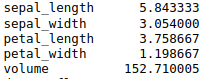

d. Novamente, calcule a média de cada atributo das flores só que agora faça-o separadamente para cada um dos tipos de íris indicados na coluna "class". 
Utilize o loop for para reduzir quantidade de linhas. <br>
Existe diferença entre as médias de cada um dos atributos das flores?

Exemplo de resposta:
[image.png](attachment:image.png)

In [158]:
classes = ["Iris-setosa", "Iris-virginica", "Iris-versicolor"]

for classe in classes:
    print(classe)
    print(tabela_dados[tabela_dados["class"]==classe].mean(axis=0))
    print()



Iris-setosa
sepal_length          5.006000
sepal_width           3.418000
petal_length          1.464000
petal_width           0.244000
Volume               38.762373
sepal_length_mean     5.006000
dtype: float64

Iris-virginica
sepal_length           6.588000
sepal_width            2.974000
petal_length           5.552000
petal_width            2.026000
Volume               258.807607
sepal_length_mean      6.588000
dtype: float64

Iris-versicolor
sepal_length           5.936000
sepal_width            2.770000
petal_length           4.260000
petal_width            1.326000
Volume               160.560036
sepal_length_mean      5.936000
dtype: float64



C:\Users\l_era\AppData\Local\Temp/ipykernel_14092/2369553689.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(tabela_dados[tabela_dados["class"]==classe].mean(axis=0))


e. Adicione uma nova coluna com o valor da média de 'sepal length' apenas para a íris da classe Iris-setosa.

In [84]:

#tabela_dados[tabela_dados["class"] =="Iris-setosa"].mean(axis=0)["sepal_length"]

tabela_dados["sepal_length_mean"]=np.nan

media = (tabela_dados[tabela_dados["class"]=="Iris-setosa"].mean(axis=0))["sepal_length"]

tabela_dados["sepal_length_mean"][tabela_dados["class"]=="Iris-setosa"]= media
tabela_dados
#tabela_dados[tabela_dados["class"]=="Iris-setosa"]["sepal_length_mean"] = tabela_dados[tabela_dados["class"]=="Iris-setosa"].mean(axis=0)["sepal_length"]




C:\Users\l_era\AppData\Local\Temp/ipykernel_14092/189052122.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media = (tabela_dados[tabela_dados["class"]=="Iris-setosa"].mean(axis=0))["sepal_length"]
C:\Users\l_era\AppData\Local\Temp/ipykernel_14092/189052122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_dados["sepal_length_mean"][tabela_dados["class"]=="Iris-setosa"]= media


,sepal_length,sepal_width,petal_length,petal_width,class,Volume,sepal_length_mean
0,5.1,3.5,1.4,0.2,Iris-setosa,38.132652,5.006
1,4.9,3.0,1.4,0.2,Iris-setosa,35.200498,5.006
2,4.7,3.2,1.3,0.2,Iris-setosa,30.072372,5.006
3,4.6,3.1,1.5,0.2,Iris-setosa,33.238050,5.006
4,5.0,3.6,1.4,0.2,Iris-setosa,36.651914,5.006
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,244.445230,NaN
146,6.3,2.5,5.0,1.9,Iris-virginica,207.816354,NaN
147,6.5,3.0,5.2,2.0,Iris-virginica,230.069302,NaN
148,6.2,3.4,5.4,2.3,Iris-virginica,217.373079,NaN



f. Adicione uma coluna com a média de 'sepal length' de tal forma que cada tipo de íris tenha seu respectivo valor de média. Utilize o loop for e faça isso sem utilizar métodos que não foram ensinados na aula de hoje.

In [88]:
for classe in classes:

    media = tabela_dados[tabela_dados["class"]==classe].mean(axis=0)["sepal_length"]

    tabela_dados["sepal_length_mean"][tabela_dados["class"]==classe] = media
    
    
print(tabela_dados)

     sepal_length  sepal_width  petal_length  petal_width           class  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

         Volume  sepal_length_mean  
0     38.132652              5.006  
1

C:\Users\l_era\AppData\Local\Temp/ipykernel_14092/328882326.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media = tabela_dados[tabela_dados["class"]==classe].mean(axis=0)["sepal_length"]
C:\Users\l_era\AppData\Local\Temp/ipykernel_14092/328882326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_dados["sepal_length_mean"][tabela_dados["class"]==classe] = media


g. Salve apenas o valor da classe, da média do sepal length e do volume desse dataset em um arquivo csv sem a coluna de index.

In [150]:

classes = tabela_dados["class"].unique()
#pd.DataFrame(my_array.reshape(-1,3), columns=['col_1','col_2','col_3'])
tabela_resumo = pd.DataFrame(classes, columns=["class"])
tabela_resumo["sepal_length_mean"]=np.nan
tabela_resumo["Volume_mean"]=np.nan
tabela_resumo["index"] = tabela_resumo["class"]

tabela_resumo = tabela_resumo.set_index("index")



for classe in tabela_resumo["class"]:
    tabela_resumo.loc[classe,"sepal_length_mean"]=(tabela_dados[tabela_dados["class"]==classe]["sepal_length"].mean())
    tabela_resumo.loc[classe,"Volume_mean"]=(tabela_dados[tabela_dados["class"]==classe]["Volume"].mean())

tabela_resumo.reset_index(inplace=True, drop=True)
tabela_resumo.to_csv("Tabela_resumo.csv")